<a href="https://colab.research.google.com/github/luhan93/di_project/blob/master/tdi_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "Comic Sans MS"

In [2]:
months = []
for year in range(2004,2020):
  for m in range(1,13):
    months.append(str(year)+'{:0>2}'.format(m))
months = months[:-2]

In [3]:

url = "https://www.census.gov/construction/bps/txt/tb2u"
dfs = [pd.read_csv(url+t+".txt", skiprows=lambda x: x <=9,sep=r'\s{2,}',engine='python',index_col=0,usecols=[0,1],header=None,names=['',t]) for t in months]

In [4]:
df = pd.concat(dfs,axis=1)

In [5]:
new_construction = df.T

In [6]:
new_construction.to_csv("drive/MyDrive/new_construction_permit.csv")

In [9]:
new_construction.index = pd.to_datetime(new_construction.index,format="%Y%m")

In [10]:
regions = {'New England': ['Connecticut','Maine','Massachusetts','New Hampshire','Rhode Island','Vermont'],
           'Middle Atlantic': ['New Jersey','New York','Pennsylvania'],
           'East North Central': ['Illinois','Indiana','Michigan','Ohio','Wisconsin'],
           'West North Central': ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota','South Dakota'],
           'South Atlantic': ['Delaware','District of Columbia','Florida','Georgia','Maryland','North Carolina','South Carolina','Virginia','West Virginia'],
           'East South Central':['Alabama','Kentucky','Mississippi','Tennessee'],
           'West South Central':['Arkansas','Louisiana','Oklahoma','Texas'],
           'Mountain': ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming'],
           'Pacific': ['Alaska','California','Hawaii','Oregon','Washington']
     }
regions['Northeast'] = regions['New England'] + regions['Middle Atlantic']
regions['Midwest'] = regions['East North Central'] + regions['West North Central']
regions['South'] = regions['South Atlantic'] + regions['East South Central'] + regions['West South Central']
regions['West'] = regions['Mountain'] + regions['Pacific']

findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


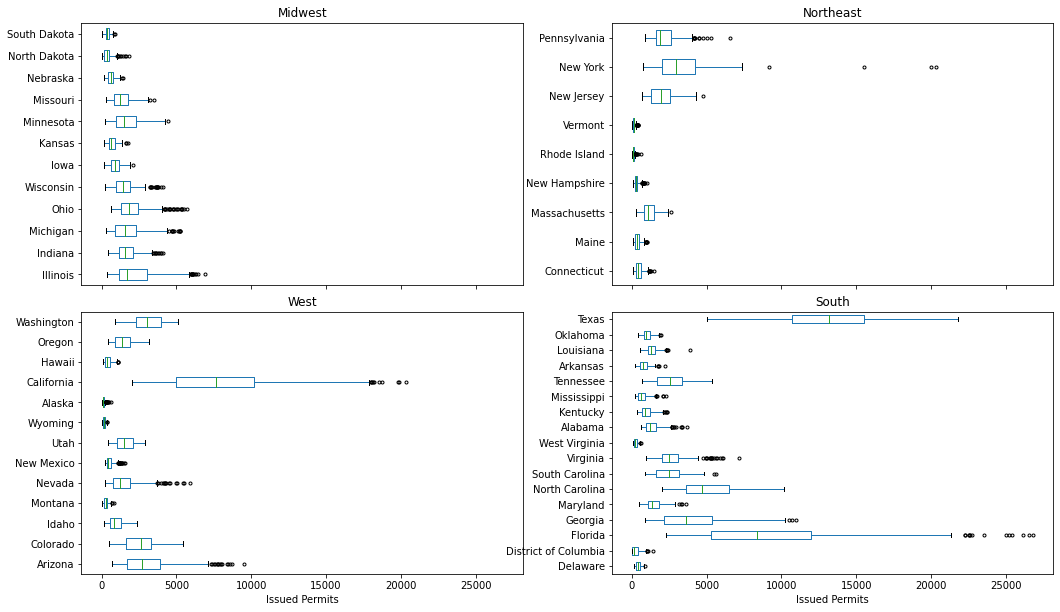

In [11]:
m_regions = [['Midwest','Northeast'],['West','South']]
fig, ax = plt.subplots(2,2,sharex=True,figsize=(15,9))
for i in range(2):
  for j in range(2):
    new_construction[regions[m_regions[i][j]]].boxplot(vert=False,ax=ax[i][j],grid=False,sym='.')
    ax[i][j].set_title(m_regions[i][j])
    
    # plt.setp(plot.get_xticklabels(), rotation=90)
ax[1][0].set_xlabel("Issued Permits")
ax[1][1].set_xlabel("Issued Permits")
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.1, wspace=0.2)